**Name:** Chandra Kiran Billingi  
 **Lab 3:** Clustering Analysis Using K-Means and K-Medoids Algorithms

**Course Title:** MSCS 634 - Advanced Big Data and Data Mining


In [31]:
#  Step 1: Load and Prepare the Dataset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load the wine dataset
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
labels = data.target

# Standardize the dataset using z-score normalization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [32]:
# Step 2: Implementing k-means clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Apply K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

# Evaluation
silhouette_kmeans = silhouette_score(df_scaled, kmeans_labels)
ari_kmeans = adjusted_rand_score(labels, kmeans_labels)

print("K-Means Silhouette Score:", silhouette_kmeans)
print("K-Means Adjusted Rand Index:", ari_kmeans)


K-Means Silhouette Score: 0.2848589191898987
K-Means Adjusted Rand Index: 0.8974949815093207


In [33]:
# installing k-mediods
!pip install scikit-learn-extra

In [34]:
# Step 3: Implement K-Medoids Clustering
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances, silhouette_score, adjusted_rand_score
from scipy.spatial.distance import cdist

# Load and prepare the dataset
data = load_wine()
X = data.data
y_true = data.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- K-Medoids Algorithm ---
def k_medoids(X, k, max_iter=100, random_state=42):
    np.random.seed(random_state)
    n_samples = X.shape[0]

    # Randomly initialize k medoids
    medoid_indices = np.random.choice(n_samples, k, replace=False)
    medoids = X[medoid_indices]

    for iteration in range(max_iter):
        # Assign each sample to the closest medoid
        distances = pairwise_distances(X, medoids, metric='euclidean')
        cluster_labels = np.argmin(distances, axis=1)

        new_medoids = []
        for i in range(k):
            cluster_points = X[cluster_labels == i]
            if len(cluster_points) == 0:
                continue
            # Compute distance matrix inside the cluster
            intra_distances = cdist(cluster_points, cluster_points)
            medoid_index = np.argmin(np.sum(intra_distances, axis=1))
            actual_index = np.where(cluster_labels == i)[0][medoid_index]
            new_medoids.append(actual_index)

        new_medoids = np.array(new_medoids)

        # Check for convergence
        if np.all(medoid_indices[:len(new_medoids)] == new_medoids):
            break
        else:
            medoid_indices[:len(new_medoids)] = new_medoids
            medoids = X[medoid_indices]

    final_distances = pairwise_distances(X, X[medoid_indices], metric='euclidean')
    final_labels = np.argmin(final_distances, axis=1)

    return medoid_indices, final_labels

# Run K-Medoids
k = 3
medoid_indices, cluster_labels = k_medoids(X_scaled, k=k)

# Evaluation metrics
silhouette = silhouette_score(X_scaled, cluster_labels)
ari = adjusted_rand_score(y_true, cluster_labels)

# Print results
print(f"Medoid Indices: {medoid_indices}")
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Adjusted Rand Index: {ari:.4f}")


Medoid Indices: [ 35  43 163]
Silhouette Score: 0.1548
Adjusted Rand Index: 0.3413


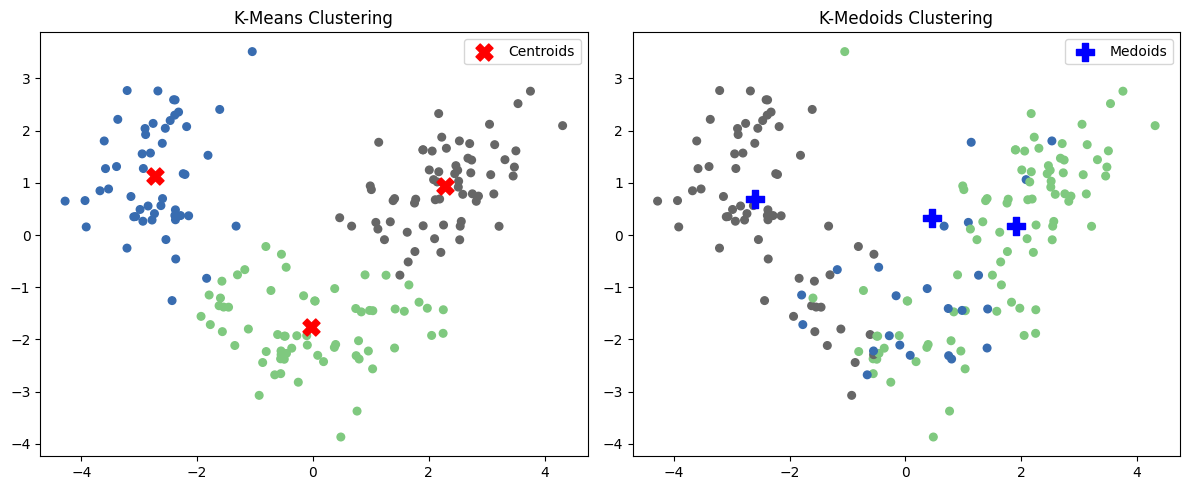

In [35]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# --- K-Means for comparison ---
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_centers = pca.transform(kmeans.cluster_centers_)

# --- K-Medoids Results (from earlier step) ---
kmedoids_centers = X_scaled[medoid_indices]
kmedoids_centers_pca = pca.transform(kmedoids_centers)

# Apply PCA to all points again
plt.figure(figsize=(12, 5))

# Plot K-Means
plt.subplot(1, 2, 1)
plt.title("K-Means Clustering")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='Accent', s=30)
plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], c='red', marker='X', s=150, label='Centroids')
plt.legend()

# Plot K-Medoids
plt.subplot(1, 2, 2)
plt.title("K-Medoids Clustering")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='Accent', s=30)
plt.scatter(kmedoids_centers_pca[:, 0], kmedoids_centers_pca[:, 1], c='blue', marker='P', s=150, label='Medoids')
plt.legend()

plt.tight_layout()
plt.show()


# Observations and Results

--> Which algorithm produced better-defined clusters?
K-means algorithm has slightly higher Silhouette score and ARI when compared to K-mediods which indicates better-defined and more accurate clusters formed on comparision to the actual class labels

From the score observations we can observe that K-mediods was very less effective in this case, as the ARI score and the silhouette score are slower when compared to K-means


--> Differences in cluster shapes or positioning?
As we know that the centers of K-means are calculated as the mean of the points which implies that the clusters tend to be spehrical and balanced

Where as on the other hand for the K-mediods it chooses actual datapoints as cluster centers, which makes it more robust to outliers but it is very less flexible in positioning custer centers optimally in continuous spaces

K-means algorithm is pereferrable when there is a continuous and well-distributed nuerical data and no strong outliers
where as on the other hand K-Medoids is preferrable when our data has outliers and the data is categorical, when we want interpretable medoids.
